# Задание 07. Методы отбора признаков

Каждое задание должно включать в себя следующие шаги: загрузка и предварительная обработка данных, применение метода отбора признаков, и, при необходимости, обучение модели на выбранных признаках и оценка производительности модели.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_wine, fetch_california_housing

# Корреляционные методы отбора признаков

## Задание 1: Работа с корреляционной матрицей.
Используйте набор данных "Iris" из sklearn.datasets. Вычислите корреляционную матрицу числовых признаков. Затем визуализируйте эту матрицу с помощью heatmap в библиотеке seaborn.

In [2]:
data = load_iris(as_frame=True)
data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
data.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
data.frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
X, y = data.data, data.target

In [6]:
X.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


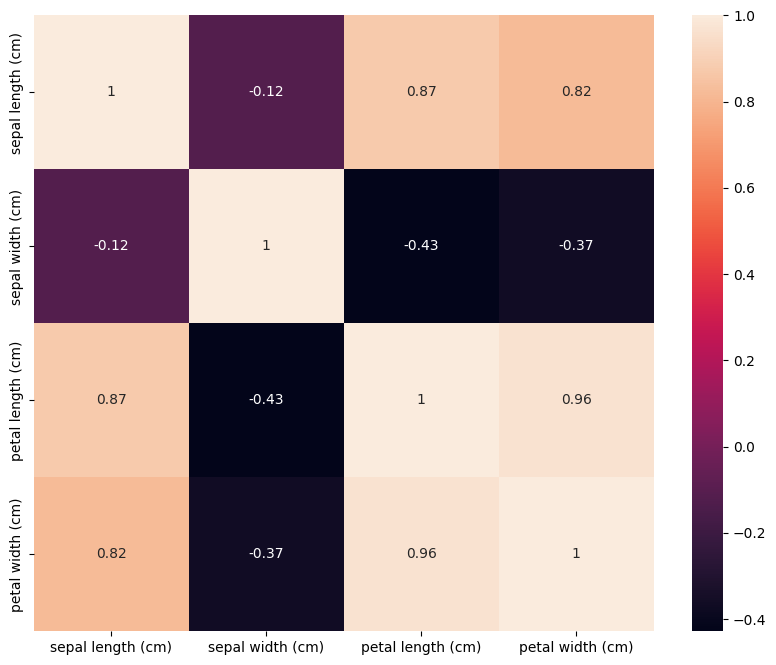

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True)
plt.show()

## Задание 2: Исключение мультиколлинеарных признаков.
Используйте набор данных "Wine" из sklearn.datasets. Вычислите корреляционную матрицу, а затем найдите и исключите признаки, у которых корреляция друг с другом превышает заданный порог.

In [8]:
data = load_wine(as_frame=True)
data.frame

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [9]:
data.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [10]:
data.frame.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [11]:
X, y = data.data, data.target

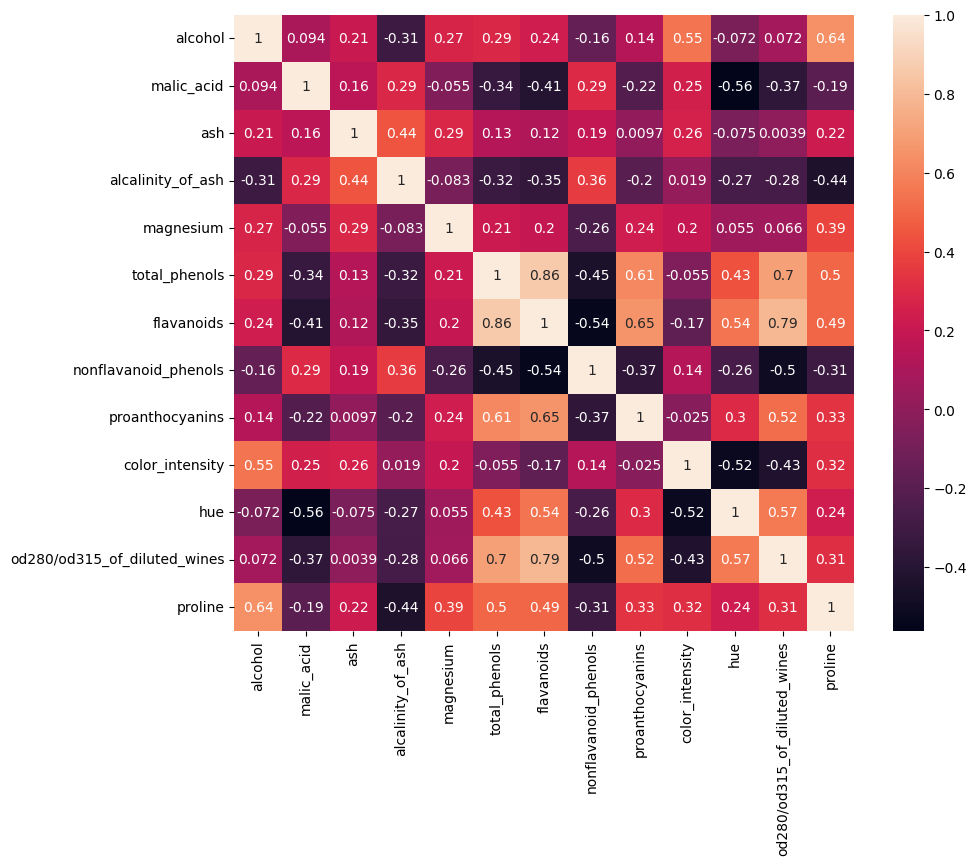

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [13]:
corr = X.corr()

columns_condition = corr[(corr > 0.7) & (corr != 1.0)].notna().any()
columns_condition

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                    True
flavanoids                       True
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines     True
proline                         False
dtype: bool

In [14]:
X = X.drop(columns=columns_condition[columns_condition==True].keys())
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,proline
0,14.23,1.71,2.43,15.6,127.0,0.28,2.29,5.64,1.04,1065.0
1,13.20,1.78,2.14,11.2,100.0,0.26,1.28,4.38,1.05,1050.0
2,13.16,2.36,2.67,18.6,101.0,0.30,2.81,5.68,1.03,1185.0
3,14.37,1.95,2.50,16.8,113.0,0.24,2.18,7.80,0.86,1480.0
4,13.24,2.59,2.87,21.0,118.0,0.39,1.82,4.32,1.04,735.0
...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,0.52,1.06,7.70,0.64,740.0
174,13.40,3.91,2.48,23.0,102.0,0.43,1.41,7.30,0.70,750.0
175,13.27,4.28,2.26,20.0,120.0,0.43,1.35,10.20,0.59,835.0
176,13.17,2.59,2.37,20.0,120.0,0.53,1.46,9.30,0.60,840.0


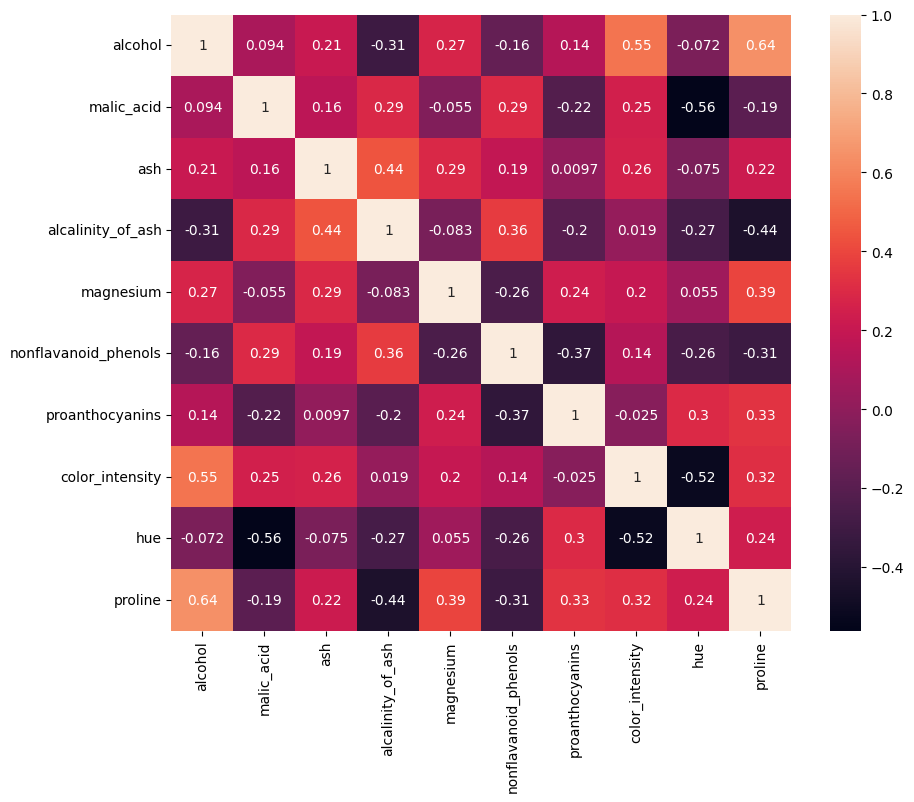

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True)
plt.show()

## Задание 3: Выбор наиболее значимых признаков.
Используйте набор данных "Boston Housing" из sklearn.datasets. Вычислите коэффициенты корреляции между каждым признаком и целевой переменной, затем выберите n признаков с наибольшим абсолютным значением коэффициента.

In [16]:
data = fetch_california_housing(as_frame=True)
data.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [17]:
data.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [18]:
data.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [19]:
features_target_corr = data.frame.corr()['MedHouseVal'][:-1]
features_target_corr

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
Name: MedHouseVal, dtype: float64

In [20]:
n = 3
top_n_features = abs(features_target_corr[features_target_corr < 1.0]).nlargest(n).index
top_n_features

Index(['MedInc', 'AveRooms', 'Latitude'], dtype='object')

## Задание 4: Применение Ранговой корреляции Спирмена.
Используйте любой набор данных, имеющий порядковые признаки. Примените корреляцию Спирмена для выбора наиболее значимых признаков.

In [21]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [23]:
data['age'] = data['age'].fillna(data['age'].median())
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['embarked'] = data['embarked'].map({'C': 0, 'Q': 1, 'S': 2}) 
data['class'] = data['class'].map({'First': 0, 'Second': 1, 'Third': 2}) 
data['adult_male'] = data['adult_male'].map({False: 0, True: 1}) 
data['alone'] = data['alone'].map({False: 0, True: 1}) 

numeric_columns = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex', 'embarked', 'class', 'adult_male', 'alone']
data_numeric = data[numeric_columns]
data_numeric

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,adult_male,alone
0,0,3,22.0,1,0,7.2500,0,2,2,1,0
1,1,1,38.0,1,0,71.2833,1,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,2,2,0,1
3,1,1,35.0,1,0,53.1000,1,2,0,0,0
4,0,3,35.0,0,0,8.0500,0,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,2,1,1,1
887,1,1,19.0,0,0,30.0000,1,2,0,0,1
888,0,3,28.0,1,2,23.4500,1,2,2,0,0
889,1,1,26.0,0,0,30.0000,0,0,0,1,1


In [24]:
from scipy.stats import spearmanr

target = 'survived'

correlations = {}

for column in data_numeric.columns:
    if column != target:
        corr, _ = spearmanr(data_numeric[column], data_numeric[target])
        correlations[column] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print("\nКорреляция Спирмена для признаков относительно 'survived':")
for feature, corr in sorted_correlations:
    print(f"{feature}: {corr:.3f}")


Корреляция Спирмена для признаков относительно 'survived':
adult_male: -0.557
sex: 0.543
pclass: -0.340
class: -0.340
fare: 0.324
alone: -0.203
embarked: -0.160
parch: 0.138
sibsp: 0.089
age: -0.037


## Задание 5: Сравнение методов отбора признаков.
Используйте один и тот же набор данных для применения различных методов отбора признаков, включая корреляционные методы, и сравните результаты.

In [126]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

data = load_iris(as_frame=True)
X, y = data.data, data.target

model = LinearRegression()
rfe = RFE(model, n_features_to_select=2)

rfe.fit(X, y)

rfe_features = X.columns[rfe.support_]

X.columns[rfe.support_]

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [128]:
features_target_corr = data.frame.corr()['target'][:-1]
features_target_corr

n = 2
top_n_features = abs(features_target_corr[features_target_corr < 1.0]).nlargest(n).index
top_n_features

Index(['petal width (cm)', 'petal length (cm)'], dtype='object')

### Задание 6: Исследование влияния предобработки данных на результаты корреляционного анализа.
Примените различные методы предобработки (например, нормализацию, стандартизацию, логарифмирование) к данным перед вычислением корреляции и сравните полученные результаты.

In [104]:
data = load_iris(as_frame=True)
X, y = data.data, data.target

In [111]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_log = np.log(X)
X_st = StandardScaler().fit_transform(X)
X_st = MinMaxScaler().fit_transform(X)

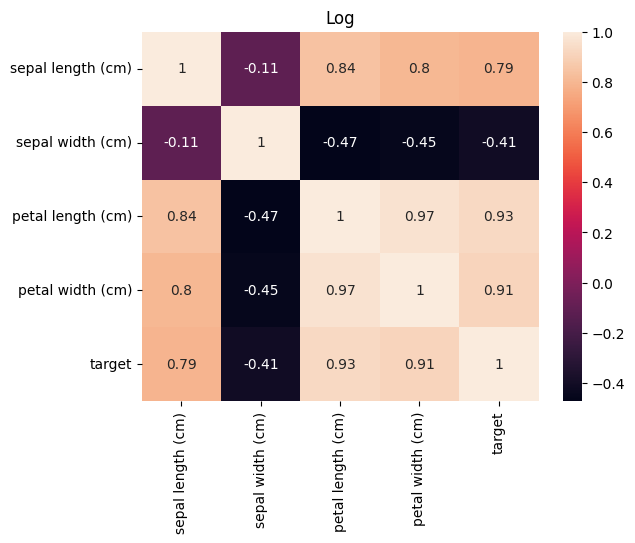

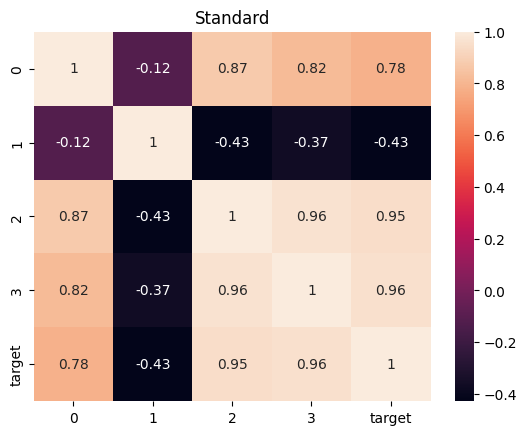

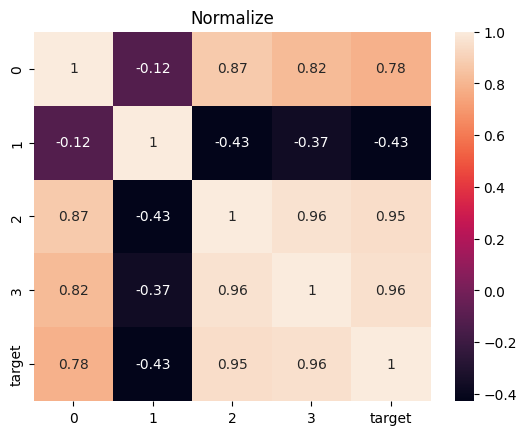

In [123]:
rf = RandomForestClassifier()

dict_preprocessing = {'Log': X_log,
                      'Standard': X_st, 
                      'Normalize': X_st}

for name in dict_preprocessing:

    sns.heatmap(pd.DataFrame(dict_preprocessing[name]).join(y).corr(), annot=True)
    plt.title(name)
    plt.show()

# Методы-обертки

## Задание 1: Рекурсивное исключение признаков (RFE).
Используйте набор данных "Iris" из sklearn.datasets. Примените метод RFE с использованием модели логистической регрессии. Укажите количество признаков для выбора и сравните производительность модели с и без этих признаков.

Получим признаки из RFE модели, указав количество k=2 признаков для выбора

In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = load_iris(as_frame=True)
X, y = data.data, data.target

k=2

linreg = LinearRegression()
rfe = RFE(linreg, n_features_to_select=k)

rfe.fit(X, y)

rfe_features = X.columns[rfe.support_]
rfe_features

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

Обучим модель линейной регрессии на всех признаках и на RFE-признаках

In [85]:
linreg.fit(X[rfe_features], y)
y_pred = linreg.predict(X[rfe_features])
mse = mean_squared_error(y_pred, y)
print(f'MSE на RFE признаках: {mse}')
    
linreg.fit(X, y)
y_pred = linreg.predict(X)
mse = mean_squared_error(y_pred, y)
print(f'MSE на всех признаках: {mse}')

MSE на RFE признаках: 0.04950325515849966
MSE на всех признаках: 0.04640405209669576


## Задание 2: Sequential Feature Selector.
Используйте набор данных "Boston Housing" из sklearn.datasets. Используйте Sequential Feature Selector для выбора признаков с использованием модели Random Forest. Визуализируйте "важность" признаков.

In [86]:
data = fetch_california_housing(as_frame=True)
X, y = data.data[:100], data.target[:100]

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SequentialFeatureSelector

rf = RandomForestRegressor()
sf = SequentialFeatureSelector(rf, n_features_to_select=3)
sf.fit(X, y)

sf_features = X.columns[sf.support_]
sf_features

Index(['AveRooms', 'AveBedrms', 'Longitude'], dtype='object')

Признак: Longitude, Важность: 0.6712133121528234
Признак: AveBedrms, Важность: 0.17353912176216116
Признак: AveRooms, Важность: 0.15524756608501547


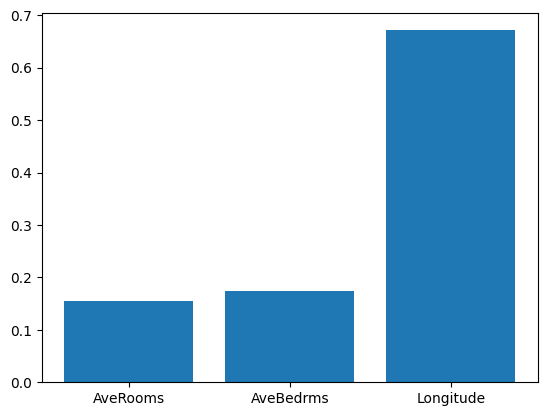

In [88]:
rf.fit(X[sf_features], y)
feature_importances = rf.feature_importances_

feature_importance_dict = dict(zip(X[sf_features].columns, feature_importances))

sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_features:
    print(f'Признак: {feature}, Важность: {importance}')

x = np.array([0, 1, 2])
plt.bar([y for y in range(len(feature_importances))], feature_importances)
plt.xticks(x, sf_features)
plt.show()

## Задание 3: Использование метода-обертки при кросс-валидации.
Используйте любой набор данных на ваше усмотрение. Выберите модель машинного обучения и метод-обертку для отбора признаков. Примените кросс-валидацию, чтобы оценить эффективность этого подхода.

In [89]:
data = load_iris(as_frame=True)
X, y = data.data, data.target

In [90]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [91]:
sfs = SequentialFeatureSelector(rf, n_features_to_select=3)
sfs.fit(X, y)

sfs_features = X.columns[sfs.support_]
sfs_features

Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')

In [92]:
cv = RepeatedStratifiedKFold(n_splits=5)

scores = cross_val_score(rf, X[sfs_features], y, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(scores)

0.9533333333333333

## Задание 4: Сравнение методов-оберток.
Используйте один и тот же набор данных для применения различных методов-оберток для отбора признаков, например, RFE и Sequential Feature Selector, и сравните полученные результаты.

In [93]:
from sklearn.metrics import accuracy_score
rfe = RFE(rf, n_features_to_select=3)

rfe.fit(X, y)

rfe_features = X.columns[rfe.support_]

print('RFE features: ', rfe_features)
print('SFS features: ', sfs_features)

RFE features:  Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')
SFS features:  Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')


In [94]:
rf.fit(X[rfe_features], y)
accuracy_score(rf.predict(X[rfe_features]), y)

1.0

In [95]:
rf.fit(X[sfs_features], y)
accuracy_score(rf.predict(X[sfs_features]), y)

1.0

In [96]:
scores_rfe = cross_val_score(rf, X[rfe_features], y, scoring='accuracy', cv=cv, n_jobs=-1)
mean_accuracy_rfe = np.mean(scores_rfe)

scores_sfs = cross_val_score(rf, X[sfs_features], y, scoring='accuracy', cv=cv, n_jobs=-1)
mean_accuracy_sfs = np.mean(scores_sfs)

print('RFE CV: ', mean_accuracy_rfe)
print('SFS CV: ', mean_accuracy_sfs)

RFE CV:  0.9526666666666667
SFS CV:  0.9540000000000001


## Задание 5: Анализ предсказательной способности признаков.
Используйте набор данных "Wine" из sklearn.datasets. Выберите модель машинного обучения и метод-обертку для отбора признаков и исследуйте, как влияет отбор признаков на предсказательную способность модели.

In [98]:
data = load_wine(as_frame=True)
X, y = data.data, data.target

In [100]:
rfe = RFE(LinearRegression(), n_features_to_select=5)
rfe.fit(X, y)

rfe_features = X.columns[rfe.support_]

rfe_features

Index(['alcohol', 'total_phenols', 'flavanoids', 'hue',
       'od280/od315_of_diluted_wines'],
      dtype='object')

In [103]:
linreg = LinearRegression()

linreg.fit(X, y)
y_pred = linreg.predict(X)

linreg.fit(X[rfe_features], y)
y_pred_rfe = linreg.predict(X[rfe_features])

print('MSE со всеми фичами: ', mean_squared_error(y, y_pred))
print('MSE с RFE фичами: ', mean_squared_error(y, y_pred_rfe))

MSE со всеми фичами:  0.059677387465844466
MSE с RFE фичами:  0.1063395776629424
